In [21]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [22]:
df = pd.read_csv("heights.csv")
df.sample(5)

,name,height
0,mohan,5.9
8,john,7.1
7,selena,6.5
5,khusbu,5.4
11,deepika,5.6


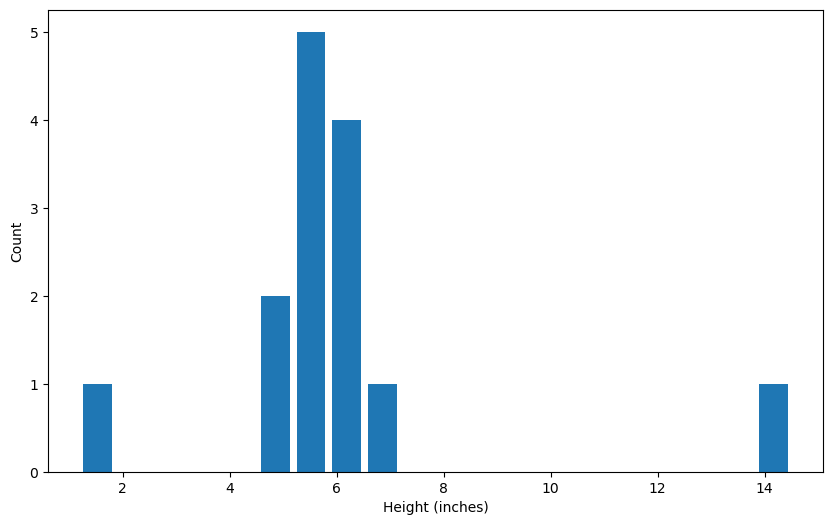

In [23]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

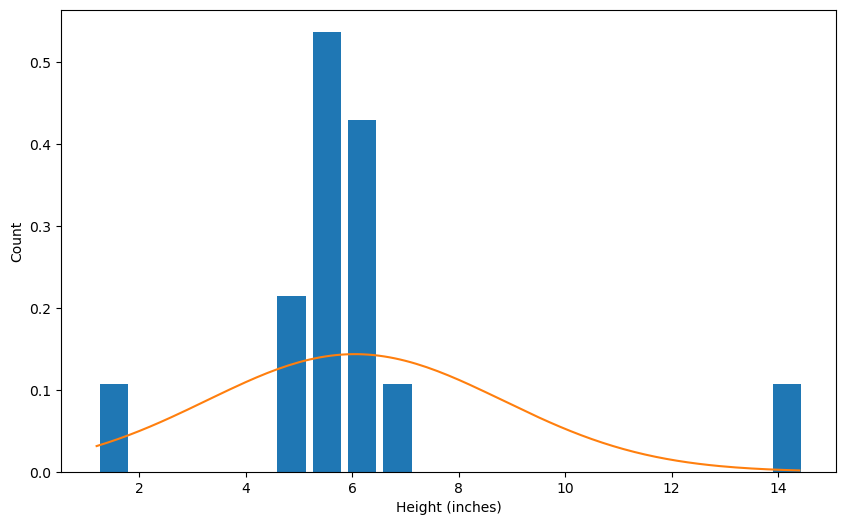

In [24]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [25]:
df.height.mean()


6.05

In [26]:
df.height.std()


2.779803534839772

# Outlier detection and removal using 3 standard deviation

In [27]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

14.389410604519316

In [28]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

-2.2894106045193157

In [29]:
df[(df.height>upper_limit) | (df.height<lower_limit)]


,name,height
9,imran,14.5


In [30]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()


,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [31]:
df_no_outlier_std_dev.shape


(13, 2)

In [32]:
df.shape


(14, 2)

In [33]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,name,height,zscore
0,mohan,5.9,-0.053961
1,maria,5.2,-0.305777
2,sakib,5.1,-0.341751
3,tao,5.5,-0.197856
4,virat,4.9,-0.413698


In [34]:
(73.84-66.37)/3.84


1.9453124999999998

In [35]:
df[df['zscore']>3]


,name,height,zscore
9,imran,14.5,3.039783


In [36]:
df[df['zscore']<-3]


,name,height,zscore


In [37]:
df[(df.zscore<-3) | (df.zscore>3)]


,name,height,zscore
9,imran,14.5,3.039783


# Remove the outliers and produce new dataframe# Remove the outliers and produce new dataframe

In [38]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,name,height,zscore
0,mohan,5.9,-0.053961
1,maria,5.2,-0.305777
2,sakib,5.1,-0.341751
3,tao,5.5,-0.197856
4,virat,4.9,-0.413698


In [39]:
df_no_outliers.shape


(13, 3)

In [40]:
df.shape


(14, 3)